In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
##filename = 'Mearure-planarity-PCB-WURTH-Thin.txt'
filename = 'planarity.txt'
with open(filename, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

for line in lines: print(line.strip())



Elément            Réel       Val. nom.           Ecart       Tol. sup.       Tol. inf.           OK/HT
(Dév PR)        (Tol PR)
Point-1(De 1 pt)
Coord. X =           60,892
Coord. Y =           89,512
Coord. Z =            0,276

Point-2[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =            0,000
Coord. Z =            0,001

Point-2[1,2](De 1 pt)
Coord. X =            0,000
Coord. Y =           10,000
Coord. Z =            0,004

Point-2[1,3](De 1 pt)
Coord. X =            0,000
Coord. Y =           20,000
Coord. Z =            0,011

Point-2[1,4](De 1 pt)
Coord. X =            0,000
Coord. Y =           30,000
Coord. Z =            0,020

Point-2[1,5](De 1 pt)
Coord. X =            0,000
Coord. Y =           40,000
Coord. Z =            0,025

Point-2[1,6](De 1 pt)
Coord. X =            0,000
Coord. Y =           50,000
Coord. Z =            0,030

Point-2[1,7](De 1 pt)
Coord. X =            0,000
Coord. Y =           60,000
Coord. Z =            0,034

Point-2[1,8](De 1 p

In [3]:
# Skip the first 3 lines (header)
for line in lines[3:-8]:
    print(line.strip())

Point-1(De 1 pt)
Coord. X =           60,892
Coord. Y =           89,512
Coord. Z =            0,276

Point-2[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =            0,000
Coord. Z =            0,001

Point-2[1,2](De 1 pt)
Coord. X =            0,000
Coord. Y =           10,000
Coord. Z =            0,004

Point-2[1,3](De 1 pt)
Coord. X =            0,000
Coord. Y =           20,000
Coord. Z =            0,011

Point-2[1,4](De 1 pt)
Coord. X =            0,000
Coord. Y =           30,000
Coord. Z =            0,020

Point-2[1,5](De 1 pt)
Coord. X =            0,000
Coord. Y =           40,000
Coord. Z =            0,025

Point-2[1,6](De 1 pt)
Coord. X =            0,000
Coord. Y =           50,000
Coord. Z =            0,030

Point-2[1,7](De 1 pt)
Coord. X =            0,000
Coord. Y =           60,000
Coord. Z =            0,034

Point-2[1,8](De 1 pt)
Coord. X =            0,000
Coord. Y =           70,000
Coord. Z =            0,037

Point-2[1,9](De 1 pt)
Coord. X =          

Point-2[7,13](De 1 pt)
Coord. X =           60,000
Coord. Y =          120,000
Coord. Z =            0,005

Point-2[7,14](De 1 pt)
Coord. X =           60,000
Coord. Y =          130,000
Coord. Z =            0,000

Point-2[7,15](De 1 pt)
Coord. X =           60,000
Coord. Y =          140,000
Coord. Z =           -0,006

Point-2[7,16](De 1 pt)
Coord. X =           60,000
Coord. Y =          150,000
Coord. Z =           -0,050

Point-2[8,1](De 1 pt)
Coord. X =           70,001
Coord. Y =            0,001
Coord. Z =            0,015

Point-2[8,2](De 1 pt)
Coord. X =           70,000
Coord. Y =           10,000
Coord. Z =            0,020

Point-2[8,3](De 1 pt)
Coord. X =           70,000
Coord. Y =           20,000
Coord. Z =            0,028

Point-2[8,4](De 1 pt)
Coord. X =           70,000
Coord. Y =           30,000
Coord. Z =            0,036

Point-2[8,5](De 1 pt)
Coord. X =           70,000
Coord. Y =           40,000
Coord. Z =            0,040

Point-2[8,6](De 1 pt)
Coord. X = 

In [4]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

skipped_lines = 0
for line in lines:
    if skipped_lines < 3 and not line.startswith('Plan'):
        skipped_lines += 1
        continue
    elif line.startswith('Plan'):
        break
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3 and current_coords['Y']>0 and current_coords['Y']!=0.001:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Print the extracted point data
for point_id, coords in point_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)

Point ID: 1,2
Coordinates: {'X': 0.0, 'Y': 10.0, 'Z': 0.004}
Point ID: 1,3
Coordinates: {'X': 0.0, 'Y': 20.0, 'Z': 0.011}
Point ID: 1,4
Coordinates: {'X': 0.0, 'Y': 30.0, 'Z': 0.02}
Point ID: 1,5
Coordinates: {'X': 0.0, 'Y': 40.0, 'Z': 0.025}
Point ID: 1,6
Coordinates: {'X': 0.0, 'Y': 50.0, 'Z': 0.03}
Point ID: 1,7
Coordinates: {'X': 0.0, 'Y': 60.0, 'Z': 0.034}
Point ID: 1,8
Coordinates: {'X': 0.0, 'Y': 70.0, 'Z': 0.037}
Point ID: 1,9
Coordinates: {'X': 0.0, 'Y': 80.0, 'Z': 0.033}
Point ID: 1,10
Coordinates: {'X': 0.0, 'Y': 90.0, 'Z': 0.025}
Point ID: 1,11
Coordinates: {'X': 0.0, 'Y': 100.0, 'Z': 0.013}
Point ID: 1,12
Coordinates: {'X': 0.0, 'Y': 110.0, 'Z': 0.005}
Point ID: 1,13
Coordinates: {'X': 0.0, 'Y': 120.0, 'Z': 0.003}
Point ID: 1,14
Coordinates: {'X': 0.0, 'Y': 130.0, 'Z': -0.036}
Point ID: 1,15
Coordinates: {'X': 0.0, 'Y': 140.0, 'Z': 0.003}
Point ID: 1,16
Coordinates: {'X': 0.0, 'Y': 150.0, 'Z': -0.038}
Point ID: 2,2
Coordinates: {'X': 10.0, 'Y': 10.0, 'Z': 0.004}
Point ID: 

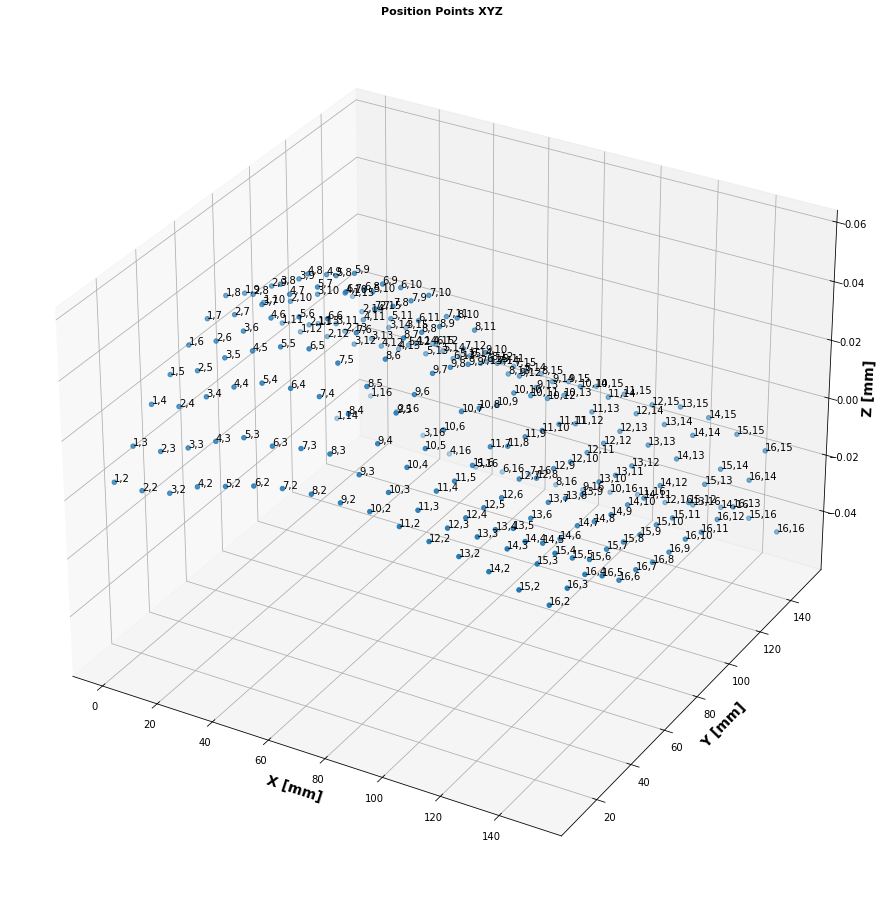

In [5]:
# Extract X, Y, Z values and corresponding point IDs
point_ids = []
x_values = []
y_values = []
z_values = []

for point_id, coords in point_data:
    point_ids.append(point_id)
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Plot the XYZ points relative to their point IDs
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values)

# Label each point with its corresponding ID
for i, point_id in enumerate(point_ids):
    ax.text(x_values[i], y_values[i], z_values[i], point_id)

# Set labels and title
ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
ax.set_title('Position Points XYZ', fontsize=11, fontweight='bold')

plt.show()


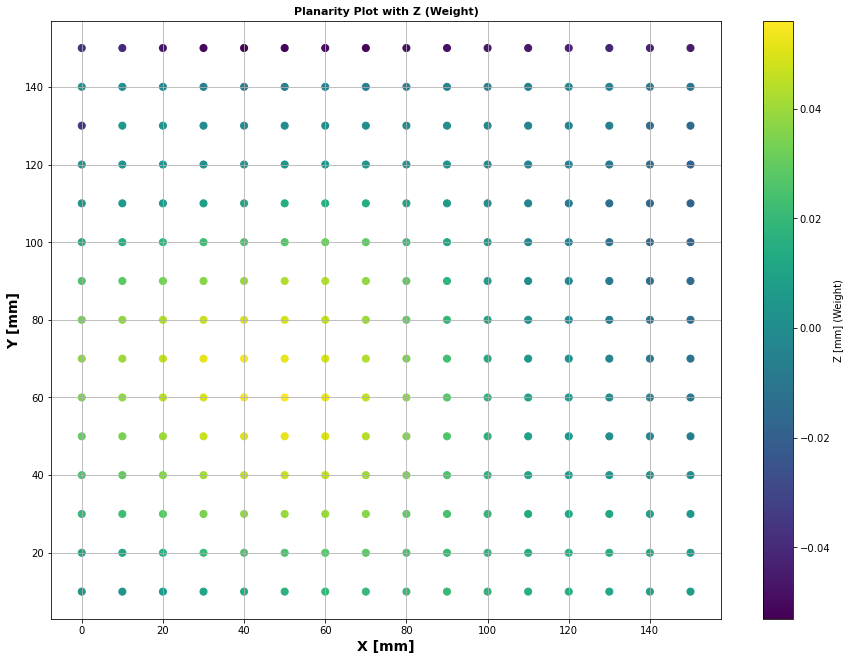

In [6]:
plt.figure(figsize=(15, 11))
plt.scatter(x_values, y_values, c=z_values, cmap='viridis', s=50)
plt.colorbar(label='Z [mm] (Weight)')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Planarity Plot with Z (Weight)', fontsize=11, fontweight='bold')
plt.grid(True)
plt.show()

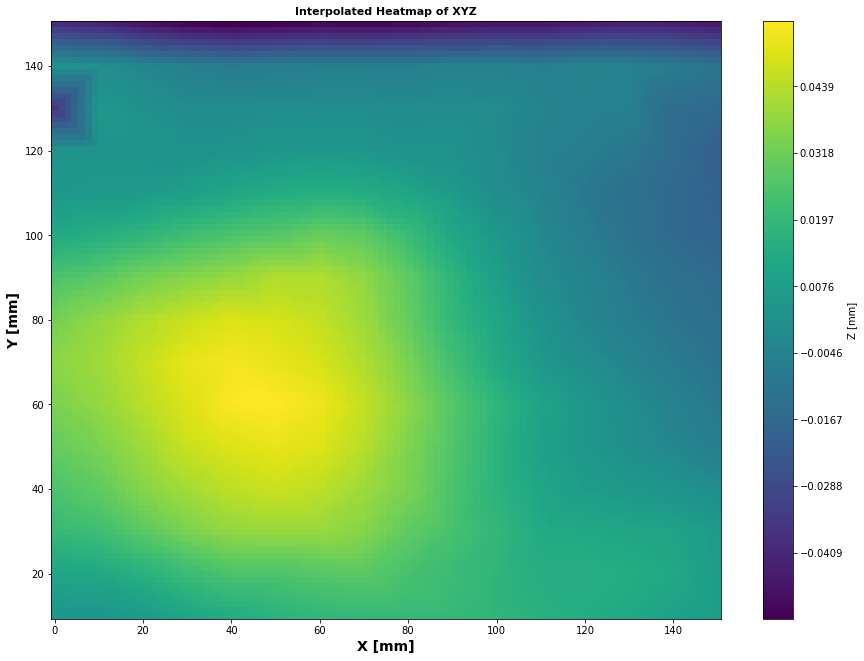

In [7]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')
Z_grid = np.linspace(min(z_values), max(z_values), 100)
#colorbar = plt.colorbar(heatmap, label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))

# Plot the heatmap
plt.figure(figsize=(15, 11))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Interpolated Heatmap of XYZ', fontsize=11, fontweight='bold')
plt.show()

In [8]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS)
rms = np.sqrt(np.mean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap:", rms)

Root Mean Square (RMS) of the heatmap: 0.02557318285048521


In [9]:
print(Z_flat)

[ 0.004       0.004       0.004      ... -0.04439394 -0.04469697
 -0.045     ]


In [10]:
# Find the NaN points
nan_indices = np.isnan(Z)
nan_points = np.column_stack((X[nan_indices], Y[nan_indices]))

# Print the NaN points
print("NaN Points (X, Y):")
print(nan_points)

NaN Points (X, Y):
[]


In [11]:
# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.02557318285048521


In [12]:
std_dev = np.std(Z_flat, ddof=1)
RMS = round(std_dev, 3)
print("RMS RAW =", RMS)

RMS RAW = 0.022


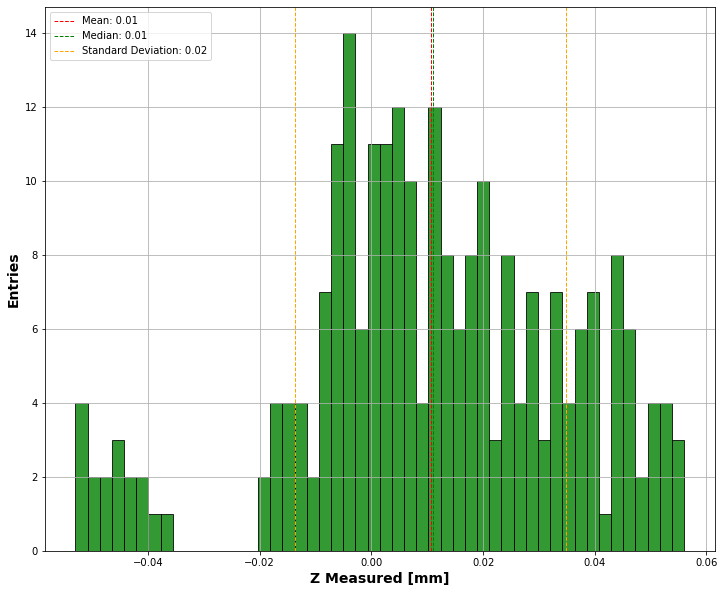

In [34]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(z_values, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(z_values)
median_value = np.median(z_values)
std_dev = np.std(z_values)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z Measured [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries', fontsize=14, fontweight='bold')
#plt.title('Histogram of Z Values')
#plt.title('Histogram with Statistics')
plt.grid(True)
plt.show()

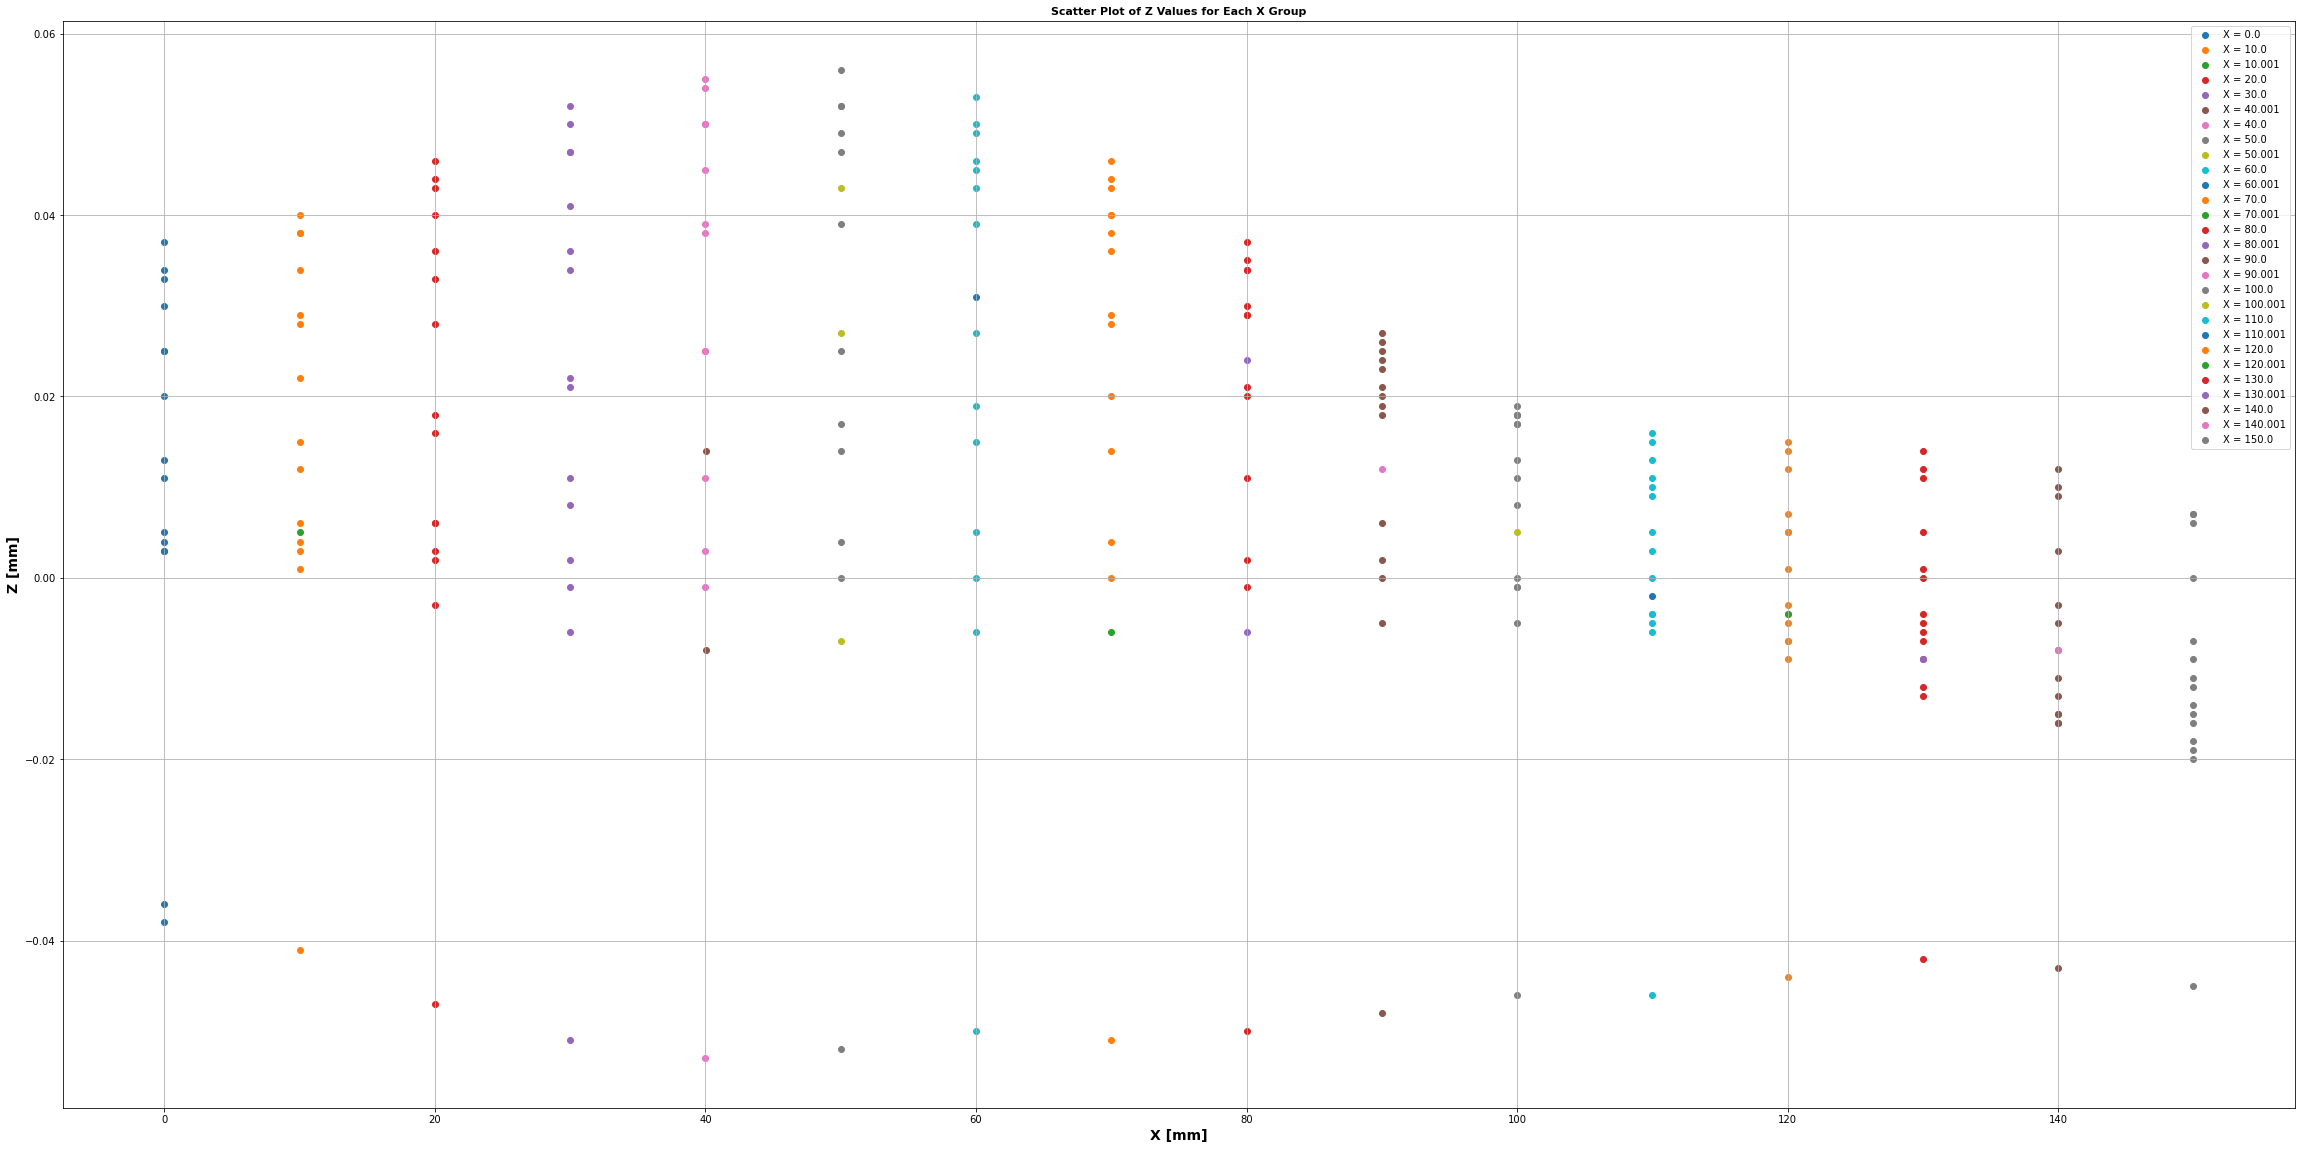

In [14]:
# Group Z values by X values
x_groups = {}
for x, z in zip(x_values, z_values):
    if x not in x_groups:
        x_groups[x] = []
    x_groups[x].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for x, z_group in x_groups.items():
    plt.scatter([x] * len(z_group), z_group, label=f"X = {x}")

plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Z Values for Each X Group', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

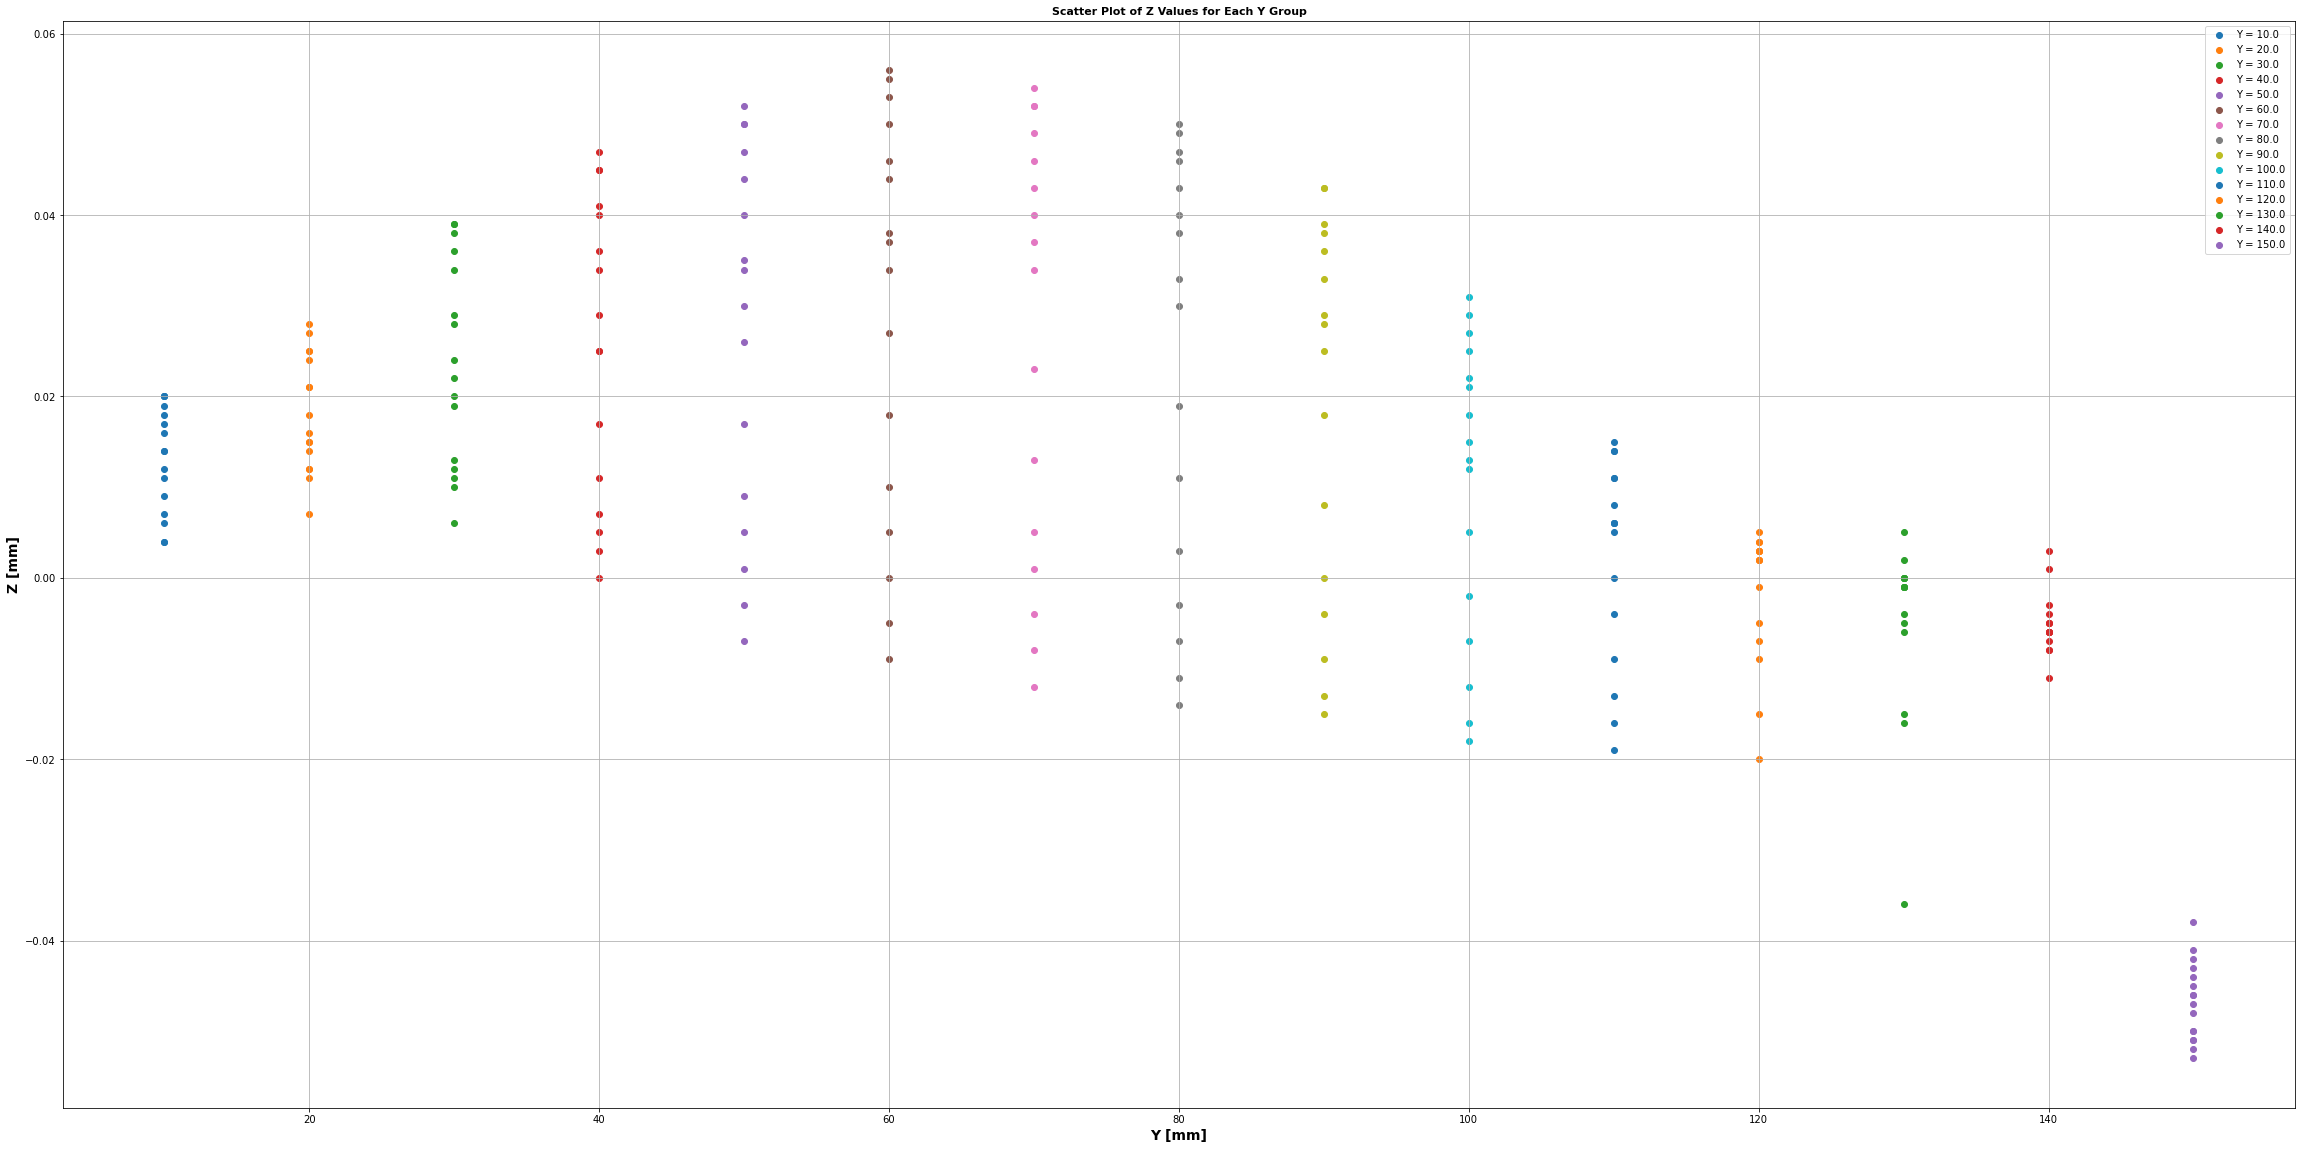

In [15]:
# Group Z values by Y values
y_groups = {}
for y, z in zip(y_values, z_values):
    if y not in y_groups:
        y_groups[y] = []
    y_groups[y].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for y, z_group in y_groups.items():
    indices = range(1, len(z_values) + 1)
    #plt.scatter(indices, z_values, label=f'Y = {y}')

    plt.scatter([y] * len(z_group), z_group, label=f"Y = {y}")

plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Z Values for Each Y Group', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

skipped_lines = 0
for line in lines:
    if skipped_lines < 3 and not line.startswith('Plan'):
        skipped_lines += 1
        continue
    elif line.startswith('Plan'):
        break
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3 and current_coords['Y']>0 and current_coords['Y']!=0.001:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Convert the data to the desired format
formatted_data = []
for point_id, coords in point_data:
    formatted_coords = {'X': coords['X'], 'Y': coords['Y'], 'Z': coords['Z']}
    formatted_data.append((point_id, formatted_coords))

# Print the formatted data
for point_id, coords in formatted_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)


Point ID: 1,2
Coordinates: {'X': 0.0, 'Y': 10.0, 'Z': 0.004}
Point ID: 1,3
Coordinates: {'X': 0.0, 'Y': 20.0, 'Z': 0.011}
Point ID: 1,4
Coordinates: {'X': 0.0, 'Y': 30.0, 'Z': 0.02}
Point ID: 1,5
Coordinates: {'X': 0.0, 'Y': 40.0, 'Z': 0.025}
Point ID: 1,6
Coordinates: {'X': 0.0, 'Y': 50.0, 'Z': 0.03}
Point ID: 1,7
Coordinates: {'X': 0.0, 'Y': 60.0, 'Z': 0.034}
Point ID: 1,8
Coordinates: {'X': 0.0, 'Y': 70.0, 'Z': 0.037}
Point ID: 1,9
Coordinates: {'X': 0.0, 'Y': 80.0, 'Z': 0.033}
Point ID: 1,10
Coordinates: {'X': 0.0, 'Y': 90.0, 'Z': 0.025}
Point ID: 1,11
Coordinates: {'X': 0.0, 'Y': 100.0, 'Z': 0.013}
Point ID: 1,12
Coordinates: {'X': 0.0, 'Y': 110.0, 'Z': 0.005}
Point ID: 1,13
Coordinates: {'X': 0.0, 'Y': 120.0, 'Z': 0.003}
Point ID: 1,14
Coordinates: {'X': 0.0, 'Y': 130.0, 'Z': -0.036}
Point ID: 1,15
Coordinates: {'X': 0.0, 'Y': 140.0, 'Z': 0.003}
Point ID: 1,16
Coordinates: {'X': 0.0, 'Y': 150.0, 'Z': -0.038}
Point ID: 2,2
Coordinates: {'X': 10.0, 'Y': 10.0, 'Z': 0.004}
Point ID: 

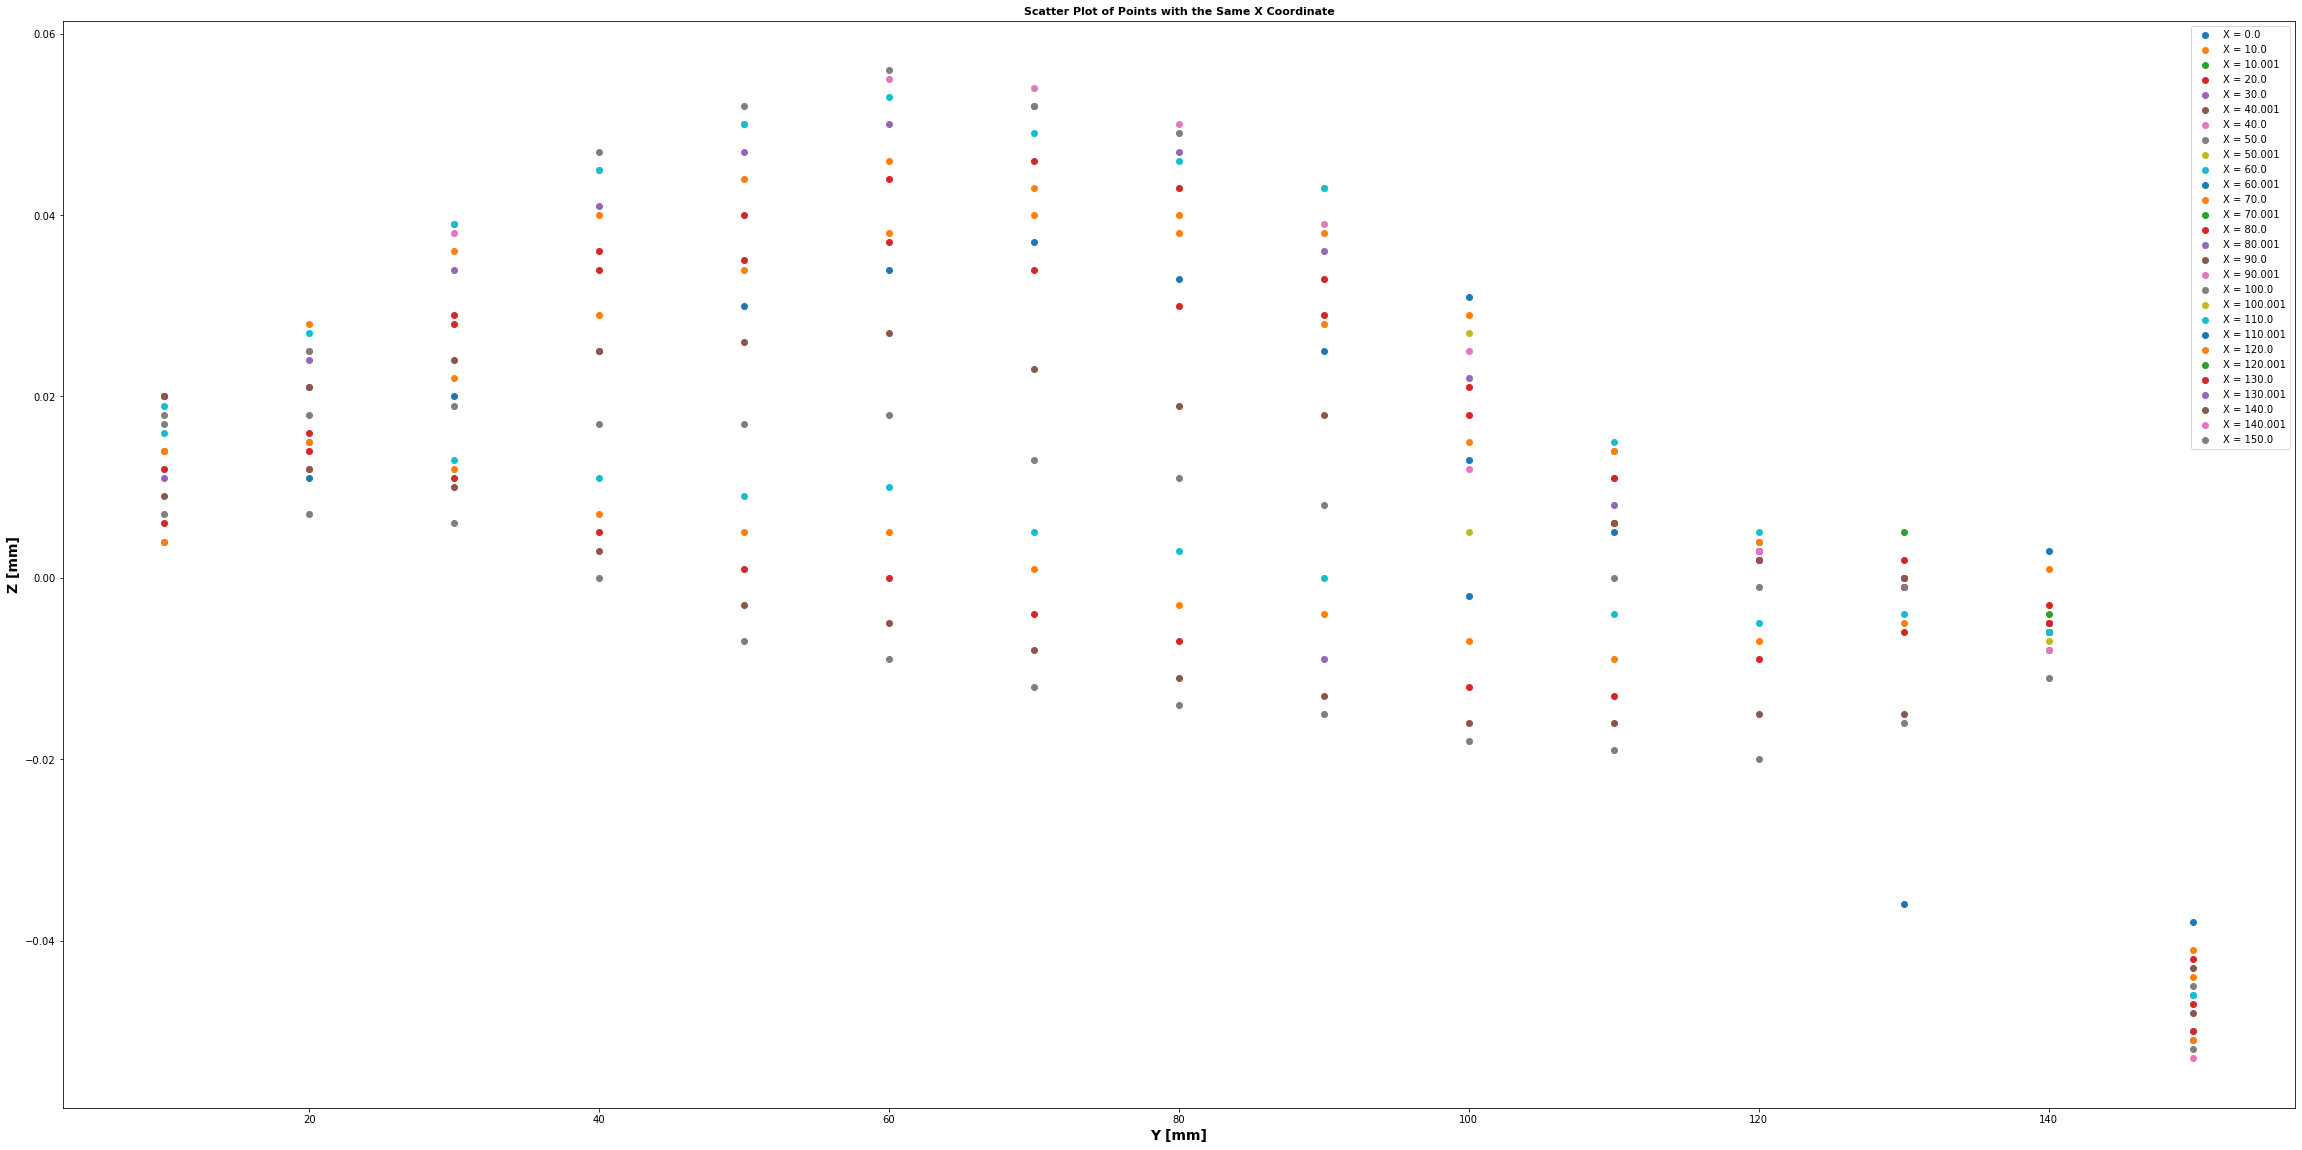

In [17]:
# Group the data by X coordinate
plt.figure(figsize=(40, 20))

grouped_data = {}
for point_id, coords in formatted_data:
    x_coord = coords['X']
    if x_coord not in grouped_data:
        grouped_data[x_coord] = []
    grouped_data[x_coord].append((point_id, coords['Y'], coords['Z']))

# Plot each group separately
for x, points in grouped_data.items():
    point_ids, ys, zs = zip(*points)
    plt.scatter(ys, zs, label=f'X = {x}')

# Add labels and legend
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Points with the Same X Coordinate', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

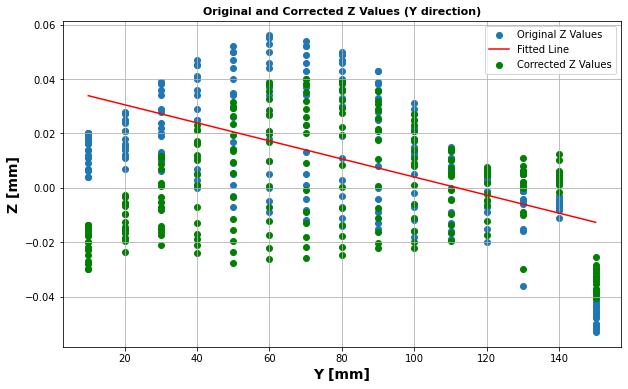

In [18]:
# Extract X, Y, and Z values from the data
x_values = []
y_values = []
z_values = []
for position, coords in formatted_data:
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Perform linear regression to fit a line to the data
slope_y, intercept_y = np.polyfit(y_values, z_values, 1)

# Calculate the fitted line
fitted_line_y = slope_y * np.array(y_values) + intercept_y

# Subtract the fitted line from the original Z values to correct for the slope in the Y direction
corrected_z_values_y = np.array(z_values) - fitted_line_y

# Plot the original and corrected Z values
plt.figure(figsize=(10, 6))
plt.scatter(y_values, z_values, label='Original Z Values')
plt.plot(y_values, fitted_line_y, color='red', label='Fitted Line')
plt.scatter(y_values, corrected_z_values_y, color='green', label='Corrected Z Values')
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Original and Corrected Z Values (Y direction)', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

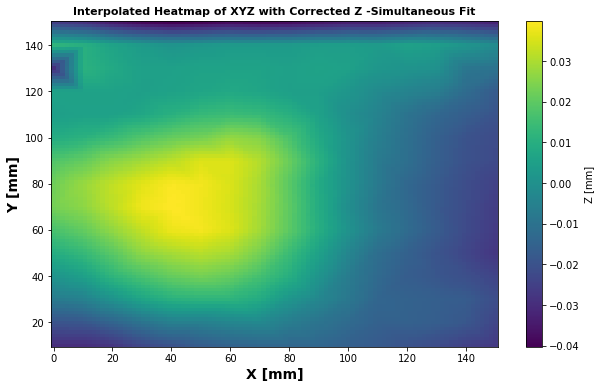

In [19]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Interpolated Heatmap of XYZ with Corrected Z -Simultaneous Fit', fontsize=11, fontweight='bold')
plt.show()

In [20]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.018056770152133424


In [21]:
std_dev = np.std(Z_flat, ddof=1)
RMS = round(std_dev, 3)
print("RMS RAW =", RMS)

RMS RAW = 0.018


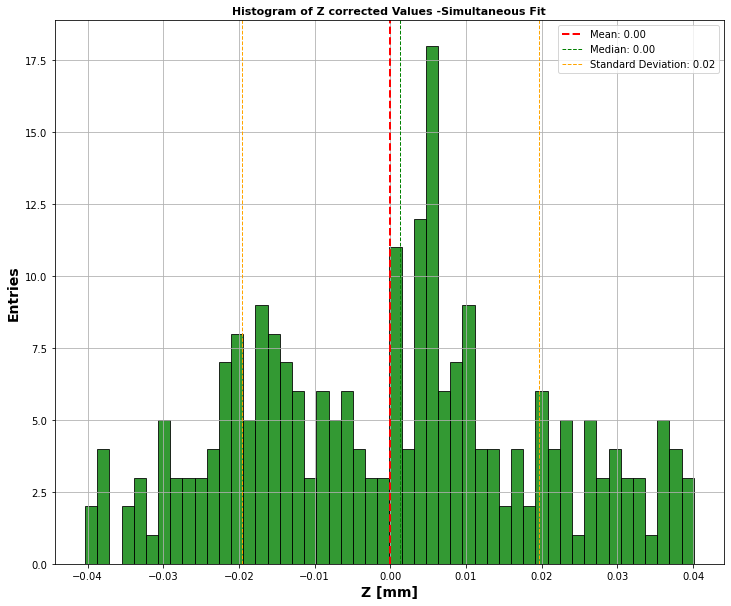

In [22]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(corrected_z_values_y, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(corrected_z_values_y)
median_value = np.median(corrected_z_values_y)
std_dev = np.std(corrected_z_values_y)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries', fontsize=14, fontweight='bold')
plt.title('Histogram of Z corrected Values -Simultaneous Fit', fontsize=11, fontweight='bold')
plt.grid(True)
plt.show()

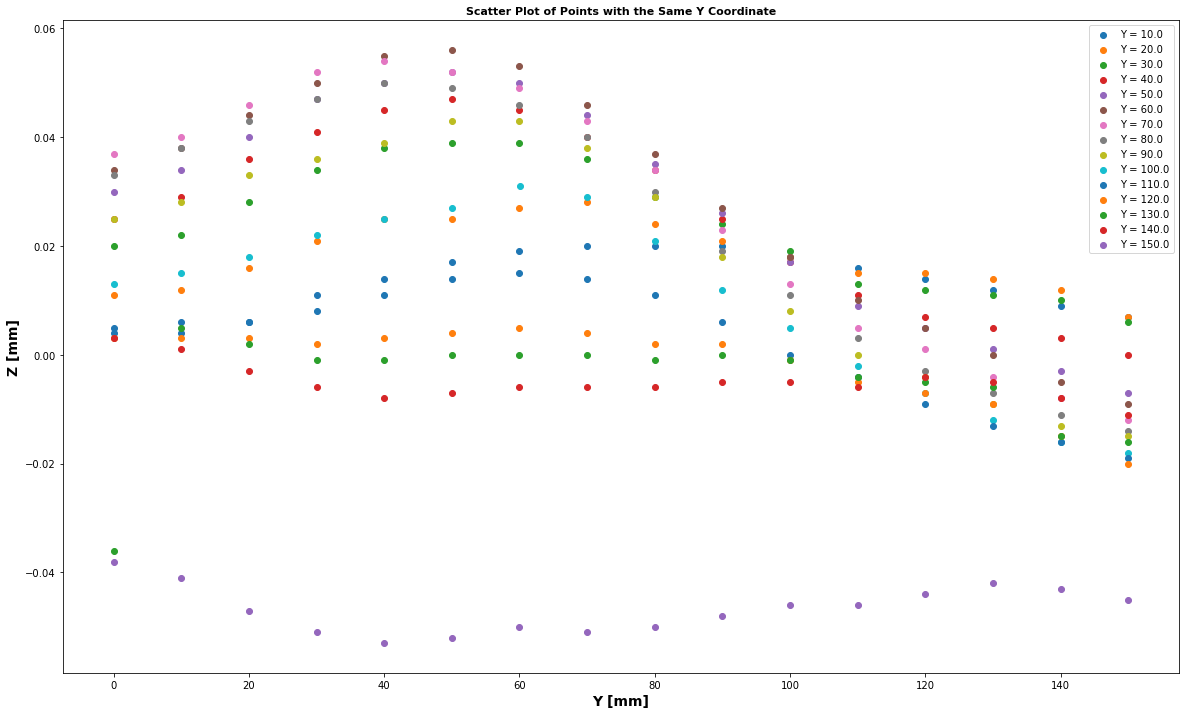

In [23]:
# Group the data by X coordinate
plt.figure(figsize=(20, 12))

grouped_data = {}
for point_id, coords in formatted_data:
    y_coord = coords['Y']
    if y_coord not in grouped_data:
        grouped_data[y_coord] = []
    grouped_data[y_coord].append((point_id, coords['X'], coords['Z']))

# Plot each group separately
for y, points in grouped_data.items():
    point_ids, xs, zs = zip(*points)
    plt.scatter(xs, zs, label=f'Y = {y}')

# Add labels and legend
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Points with the Same Y Coordinate', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

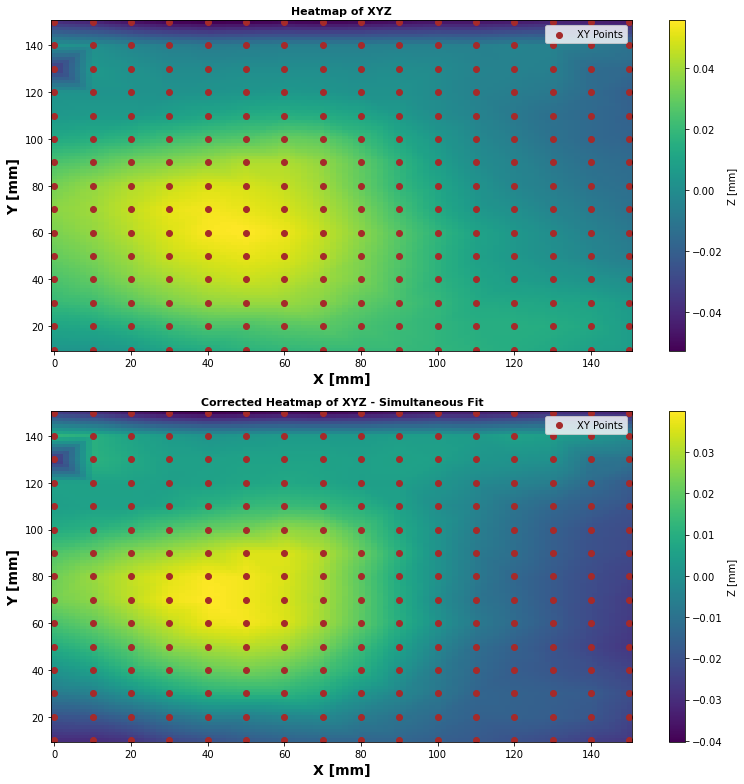

In [37]:
plt.figure(figsize=(11, 11))

Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')

# Plot the heatmap
plt.subplot(2, 1, 1)
im = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(im, label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of XYZ',  fontsize=11, fontweight='bold')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()

Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the scatter plot
plt.subplot(2, 1, 2)
sc = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(sc, label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Corrected Heatmap of XYZ - Simultaneous Fit', fontsize=11, fontweight='bold')
# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()


plt.tight_layout()
plt.show()

In [25]:
def fit_plane(formatted_data):   
    # Extract X, Y, and Z coordinates from the formatted data 
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Construct the design matrix contains the independent variables
    A = np.vstack((X, Y, np.ones_like(X))).T #stacking X, Y, and a column of ones (for the intercept term) vertically and transposing it. 
    #This design matrix is used in the least squares regression.
    
    # Perform least squares regression to find the plane parameters
    #params, _, _, _ = np.linalg.lstsq(A, Z, rcond=None) 
    params, residuals, rank, singular_values = np.linalg.lstsq(A, Z, rcond=None)

    #contains the coefficients of the plane equation (a, b, c) that minimize the sum of squared residuals.
    #assigned to _ to indicate that they're being ignored.
    
    # Extract plane parameters (coefficients of the plane equation: ax + by + c = z)
    a, b, c = params
    residuals = residuals  #the residual sum of squares, which represents the sum of squared differences between the observed and predicted values of Z
    singular_values = singular_values # the singular values of A
    return a, b, c, residuals, singular_values

a, b, c, residuals, singular_values = fit_plane(formatted_data)
print("Plane parameters: a =", a, ", b =", b, ", c =", c, ", residuals = ", residuals, ", singular values = ", singular_values)


Plane parameters: a = -0.00020289199510588435 , b = -0.00033227660456068206 , c = 0.052394874857262304 , residuals =  [0.07107084] , singular values =  [1833.99641959  693.30055228    5.8238436 ]


In [26]:
# Visualize the fitted plane and original points
def visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values):
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Create a meshgrid for X and Y coordinates
    X_grid, Y_grid = np.meshgrid(np.linspace(min(X), max(X), 10), np.linspace(min(Y), max(Y), 10))
    
    # Calculate Z values for the fitted plane
    Z_plane = a * X_grid + b * Y_grid + c

    # Plot the points
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, color='b', label='Original Points')
    
    # Plot the fitted plane
    ax.plot_surface(X_grid, Y_grid, Z_plane, alpha=0.5, color='r', label='Fitted Plane')
    
    # Set labels and title
    ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
    ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
    ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
    ax.set_title('Planarity Fitted Plane', fontsize=11, fontweight='bold')
    
    # Add legend
    ax.legend()
    
    # Show plot
    plt.show()

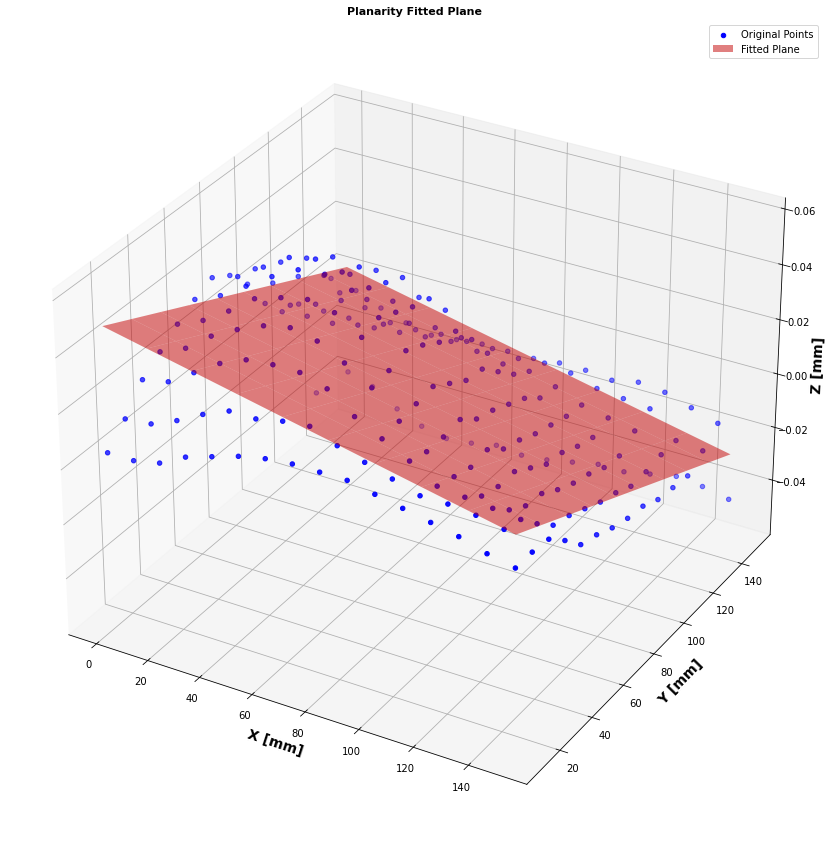

In [27]:
#a, b, c = fit_plane(formatted_data)
a, b, c, residuals, singular_values = fit_plane(formatted_data)
#visualize_plane_and_points(formatted_data, a, b, c)
visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values)

In [28]:
def calculate_planarity_metrics(formatted_data, a, b, c):
    # Extract X, Y, and Z coordinates from the formatted data
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Calculate distances from points to the fitted plane
    distances = np.abs(a * X + b * Y - Z + c) / np.sqrt(a**2 + b**2 + 1)
    
    # Calculate RMS of the distances
    rms_distance = np.sqrt(np.mean(distances**2))
    
    # Calculate deviation of the points from the plane
    deviation = distances.mean()
    
    return rms_distance, deviation

In [29]:
rms_distance, deviation = calculate_planarity_metrics(formatted_data, a, b, c)
print("RMS Distance:", rms_distance) #the root mean square (RMS) of the distances between the data points and the fitted plane
print("Deviation:", deviation) #the deviation of the data points from the plane


RMS Distance: 0.017208383208542406
Deviation: 0.012970379196482761


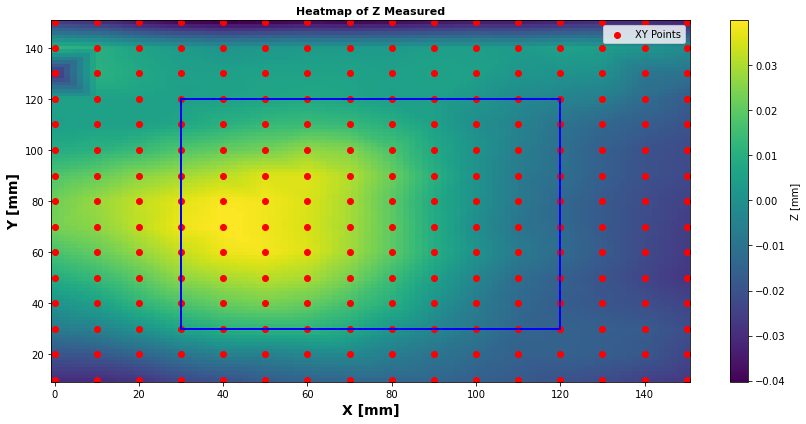

In [30]:
# Define the point IDs
point_4_4_id = '4,4'
point_4_13_id = '4,13'
point_13_4_id = '13,4'
point_13_13_id = '13,13'


# Find the XY coordinates corresponding to the specified point IDs
point_4_4_xy = None
point_4_13_xy = None
point_13_4_xy = None
point_13_13_xy = None

for point_id, coords in formatted_data:
    if point_id == point_4_4_id:
        point_4_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_4_13_id:
        point_4_13_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_4_id:
        point_13_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_13_id:
        point_13_13_xy = (coords['X'], coords['Y'])

# Plot the heatmap of Z
plt.figure(figsize=(12, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of Z Measured', fontsize=11, fontweight='bold')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')

# Connect specified points with lines
plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()


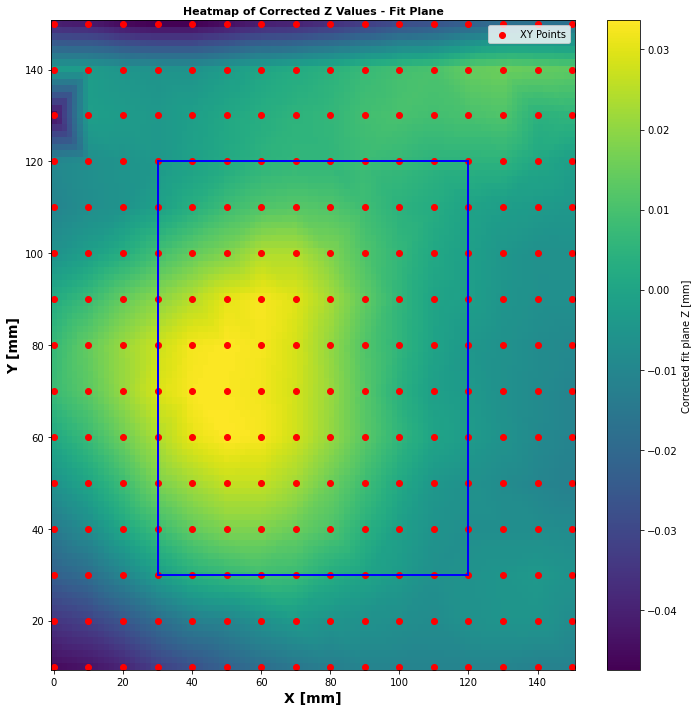

In [31]:
x_values = np.array([coords['X'] for _, coords in formatted_data])
y_values = np.array([coords['Y'] for _, coords in formatted_data])
z_values = np.array([coords['Z'] for _, coords in formatted_data])

# Correct the Z values based on the fitted plane
corrected_z_values = z_values - (a * x_values + b * y_values + c)

# Create a grid for the heatmap
X, Y = np.meshgrid(np.linspace(min(x_values), max(x_values), 100),
                   np.linspace(min(y_values), max(y_values), 100))

# Interpolate the corrected Z values onto the grid
Z_corrected = griddata((x_values, y_values), corrected_z_values, (X, Y), method='linear')


# Plot the heatmap of corrected Z values
plt.figure(figsize=(10, 10))
plt.pcolormesh(X, Y, Z_corrected, cmap='viridis')
plt.colorbar(label='Corrected fit plane Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of Corrected Z Values - Fit Plane', fontsize=11, fontweight='bold')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')
# Connect specified points with lines
plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()

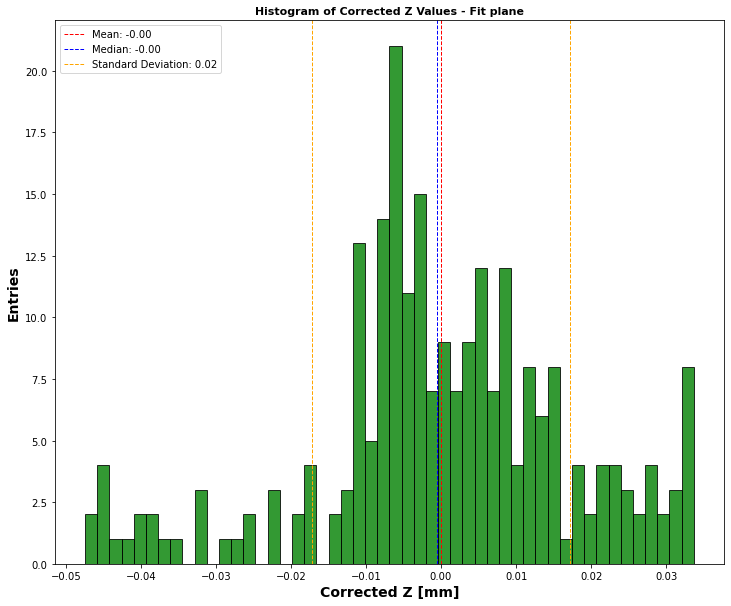

In [32]:
# Flatten the 2D array Z_corrected into a 1D array
Z_corrected_flat = corrected_z_values.flatten()

# Plot the histogram of the corrected Z values
plt.figure(figsize=(12, 10))
plt.hist(Z_corrected_flat, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(Z_corrected_flat)
median_value = np.median(Z_corrected_flat)
std_deviation = np.std(Z_corrected_flat)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_deviation:.2f}')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=1)
plt.xlabel('Corrected Z [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries', fontsize=14, fontweight='bold')
plt.title('Histogram of Corrected Z Values - Fit plane', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

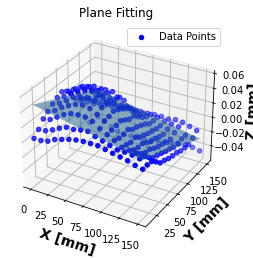

In [33]:
X_test = np.column_stack((x_values, y_values, np.ones_like(x_values)))

# Fit linear regression model
model = LinearRegression().fit(X_test, z_values)

# Get the coefficients (normal vector) of the plane
normal_vector = model.coef_
intercept = model.intercept_

# Generate points on the plane for visualization
x_plane = np.linspace(min(x_values), max(x_values), 10)
y_plane = np.linspace(min(y_values), max(y_values), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = normal_vector[0] * x_plane + normal_vector[1] * y_plane + intercept

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c='b', marker='o', label='Data Points')

# Plot the plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
ax.set_title('Plane Fitting')

plt.legend()
plt.show()
